In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load all data

import os
os.chdir("..")
# key = path
data = {}
for root in ["new_1Intermediate","new_2Intermediate"]:
    for path_no in os.listdir(root):
        for wind_speed in os.listdir(os.path.join(root,path_no)):
            for wind_angle in os.listdir(os.path.join(root,path_no,wind_speed)):
                for drone in os.listdir(os.path.join(root,path_no,wind_speed,wind_angle)):
                    csv_path = os.path.join(root,path_no,wind_speed,wind_angle,drone)
                    data[csv_path] = pd.read_csv(csv_path)



In [ ]:
# problem: the last drone might not stabilize its voltage before the logging end.
# potential solution: we can just take the 2 highest voltage instead.

In [4]:
def iterate_all_data(todo):
    for root in ["new_1Intermediate","new_2Intermediate"]:
        for path_no in os.listdir(root):
            for wind_speed in os.listdir(os.path.join(root,path_no)):
                for wind_angle in os.listdir(os.path.join(root,path_no,wind_speed)):
                    for drone in os.listdir(os.path.join(root,path_no,wind_speed,wind_angle)):
                        csv_path = os.path.join(root,path_no,wind_speed,wind_angle,drone)
                        todo(csv_path)

In [40]:
# idea 5
# show how lower starting battery affect the charging time
from statistics import mean
# for each flights
# take the first voltage, take the middle number in waiting time, take the average of first voltage, and take the total charging time across all drones in the same flight
def first_vol_vs_charging_time(root):
    first_voltage_avgs = []
    charging_time_totals = []

    for path_no in os.listdir(root):
        for wind_speed in os.listdir(os.path.join(root,path_no)):
            for wind_angle in os.listdir(os.path.join(root,path_no,wind_speed)):
                first_voltage = []
                charging_time = []
                for drone in os.listdir(os.path.join(root,path_no,wind_speed,wind_angle)):
                    csv_path = os.path.join(root,path_no,wind_speed,wind_angle,drone)
                    first_voltage.append(data[csv_path]["pm.vbat"].iloc[0])
                    if root == "new_2Intermediate":
                        charging_time.append((int(data[csv_path]["waiting_time"].iloc[-1].split('|')[1]),int(data[csv_path]["waiting_time"].iloc[-1].split('|')[2])))
                    else:
                        charging_time.append(int(data[csv_path]["waiting_time"].iloc[-1].split('|')[1]))
                first_voltage_avgs.append(mean(first_voltage))
                if root == "new_2Intermediate":
                    totals_each_charger = [0,0]
                    for a in charging_time:
                        totals_each_charger[0] += a[0]
                        totals_each_charger[1] += a[1]
                    charging_time_totals.append(mean(totals_each_charger)/1000)
                else:
                    charging_time_totals.append(sum(charging_time)/1000)
    return (first_voltage_avgs,charging_time_totals)                 
                    

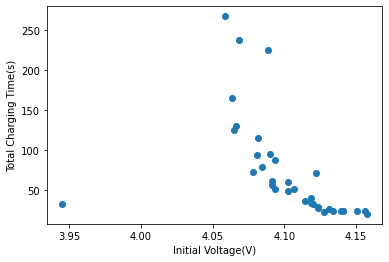

In [34]:
# total charging time in a flight for a given average initial voltage across all drone(in flights with 1 intermediate)
first_voltage_avgs,charging_time_totals = first_vol_vs_charging_time("new_1Intermediate")
plt.scatter(first_voltage_avgs,charging_time_totals)
plt.xlabel("Initial Voltage(V)")
plt.ylabel("Total Charging Time(s)")
plt.show()

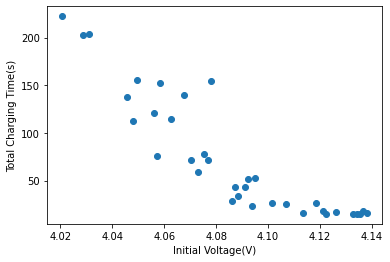

In [41]:
# average total charging time in each charger during a flight for a given initial voltage
first_voltage_avgs,charging_time_totals = first_vol_vs_charging_time("new_2Intermediate")
plt.scatter(first_voltage_avgs,charging_time_totals)
plt.xlabel("Initial Voltage(V)")
plt.ylabel("Total Charging Time(s)")
plt.show()

In [ ]:
# idea 1
# convert voltage to percentage
# calculate changes in percentage for different height across the data

# problem: this is probably showing different percentage drop because drone that are low and just start flying will have its voltage drop by a lot which 
# can be seen as huge drop in percentage when it is not really the case.

# potential solution:
# we only take the voltage after it is flying for long enough and not taking the voltage that is towards the end of the flight where it goes up by a lot.

# problem on potential solution:
# the time that we observe will be really short, and even then it is usually not very stable.


# idea 2
# total travel distance vs battery percentage drop(calculated using percentage early - percentage in the end)


# idea 3 
# wind speed vs battery percentage/voltage drop

# idea 4
# wind direction vs battery percentage/voltage drop



# idea 6
# show how lower starting battery affect the battery level in the end.